In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (18, 10)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['font.size'] = 14

In [3]:
import warnings
warnings.simplefilter("ignore")

from tqdm.notebook import trange

import numpy as np
import pandas as pd

from btb.tuning.hyperparams import IntHyperParam, FloatHyperParam
from btb.tuning.tunable import Tunable
from btb.tuning.tuners import UniformTuner
from btb.tuning.tuners.gaussian_process import GaussianProcessTuner

from sklearn.metrics import mean_squared_error

In [4]:
def rosenbrock(x, y, a=1, b=100):
    """Bigger is better; global optimum at x=a, y=a**2"""
    return -1 * ((a - x)**2 + b * (y - x**2)**2)

In [28]:
hyperparams = {
    'x': FloatHyperParam(-50, 50),
    'y': FloatHyperParam(-50, 50)
}
tunable = Tunable(hyperparams)

In [29]:
tuner = GaussianProcessTuner(tunable, scale=10)
best_score = -np.inf

scores = list()
best_scores = list()
predictions = list()

for _ in trange(1000):
    proposal, predicted = tuner.propose(return_scores=True)
    score = rosenbrock(**proposal)
    tuner.record(proposal, score)

    if score > best_score:
        best_score = score
        
    scores.append(score)
    best_scores.append(best_score)
    predictions.append(predicted)

sdf = pd.DataFrame({
    'score': -np.log(-np.array(scores[2:]) + 1),
    'best_score': -np.log(-np.array(best_scores[2:]) + 1),
    'predicted': -np.log(-np.array(predictions[2:]) + 1)
})

mse = mean_squared_error(sdf.dropna().score, sdf.dropna().predicted)

print("Best Score: ", best_score)
print("MSE: ", mse)
print("MSE/MEAN: ", mse/sdf.score.abs().mean())


Best Score:  -0.007503387322203159
MSE:  0.12716825188363656
MSE/MEAN:  0.0356191296514843


In [30]:
sdf = pd.DataFrame({
    'score': -np.log(-np.array(scores[2:]) + 1),
    'best_score': -np.log(-np.array(best_scores[2:]) + 1),
    'predicted': -np.log(-np.array(predictions[2:]) + 1)
})

In [31]:
sdf.mean()

score        -3.570223
best_score   -0.337270
predicted    -3.244184
dtype: float64

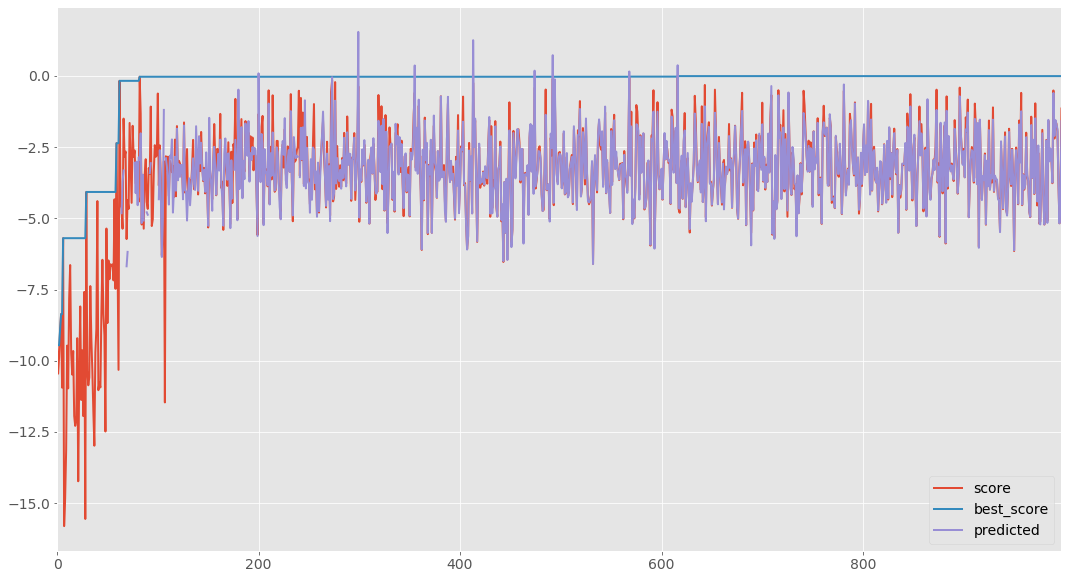

In [32]:
sdf.plot()